In [59]:
#This is an exploratory project about historical MLB baseball salaries. I have data going back to 1985. And I want to explore how professional baseball players salaries have changed throughout the years.
#Import pandas and name it pd to make it easier
import pandas as pd

#read in csv
df = pd.read_csv("Documents/213R/Salaries.csv")
df

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
5,1985,ATL,NL,chambch01,800000
6,1985,ATL,NL,dedmoje01,150000
7,1985,ATL,NL,forstte01,483333
8,1985,ATL,NL,garbege01,772000
9,1985,ATL,NL,harpete01,250000


In [81]:
#summary statistics 
df.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


In [55]:
#Identify ways to clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [56]:
df.columns[df.isnull().any()]

Index([], dtype='object')

,yearID,salary
0.25,1994.0,294702.0
0.75,2009.0,2350000.0
iqr,15.0,2055298.0
whisker_length,22.5,3082947.0
max_whisker,2031.5,5432947.0
min_whisker,1971.5,-2788245.0


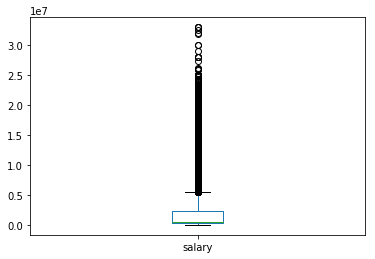

In [45]:
## shows graphs inline
%matplotlib inline
bbox = df['salary'].plot(kind="box")
q_df = df.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

In [61]:
#Scale the data
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], 
        [-0.5, 6], 
        [0, 10], 
        [1, 18]]
standard = StandardScaler()
standard_data = standard.fit_transform(data)
print(np.mean(standard_data, 0))
print(np.std(standard_data, 0))

[0. 0.]
[1. 1.]


In [73]:
df.groupby(df['yearID'])


Text(0.5, 1.0, 'MLB Salaries')

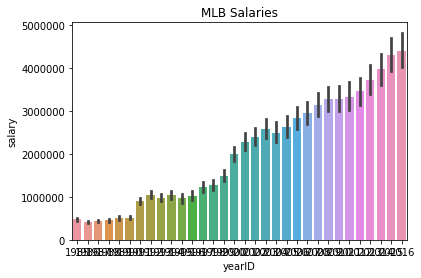

In [80]:
import seaborn as sns
sns.barplot(df.yearID, df.salary).set_title('MLB Salaries')
# This bar graph presents a visual that shows clearly how salaries have gone up at an alarming rate since 1985.